# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


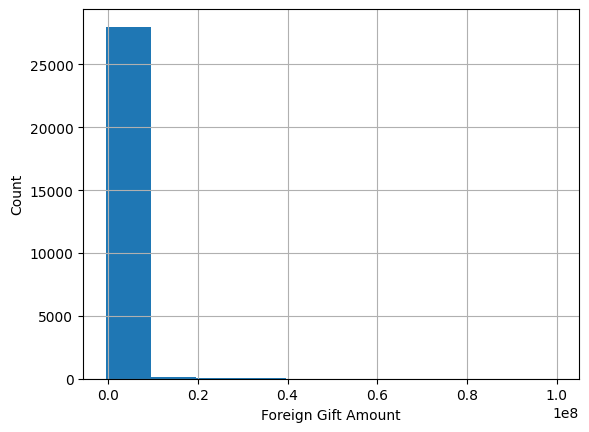

Proportion of each gift type:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390


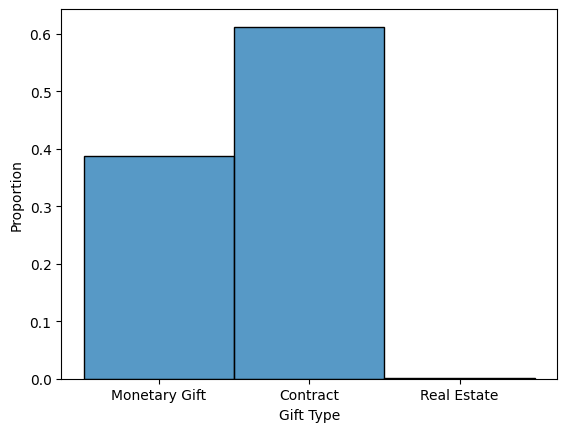

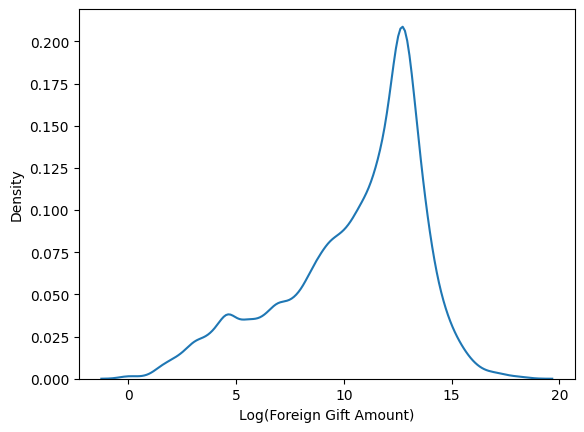

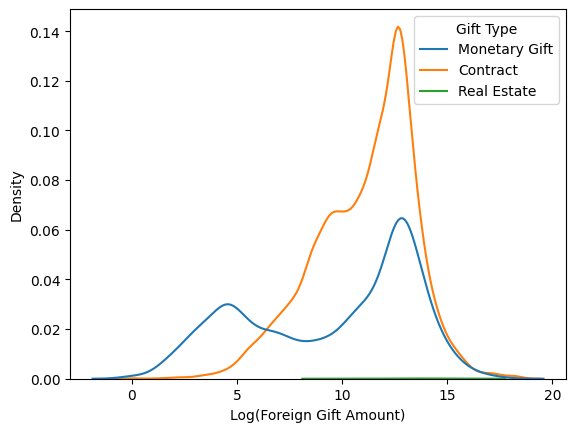

'\nPatterns noticed: overall kde looks most similiar to the conditional kde of contracts.\nMy prediction is that because the contract gift type is the most common it has the most\ninfluence/weight on the shape of the overall plot.\n\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Q2 Part 1
df = pd.read_csv("/content/ForeignGifts_edu.csv")
df.head()
df.tail()

#Q2 Part 2
print(df["Foreign Gift Amount"].describe())
df["Foreign Gift Amount"].hist()
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.show()

"""
The histogram shows a long tail distribution and doesn't give us much to work with in terms
of the visualization. We can smooth it out and shrink the extrememely large values to bring
it to scale using arcsin() or log() functions.
"""

#Q2 Part 3
counts = df["Gift Type"].value_counts()
total= df["Gift Type"].count()
print("Proportion of each gift type:\n" + (counts/total).to_string())
sns.histplot(df['Gift Type'], stat = "proportion")
plt.xlabel("Gift Type")
plt.ylabel("Proportion")
plt.show()

#Q2 Part 4
df = df[df["Foreign Gift Amount"] > 0]
df["Log Gift Amount"] = np.log(df["Foreign Gift Amount"])

sns.kdeplot(data=df, x="Log Gift Amount")
plt.xlabel("Log(Foreign Gift Amount)")
plt.ylabel("Density")
plt.show()

sns.kdeplot(data=df, x="Log Gift Amount", hue="Gift Type")
plt.xlabel("Log(Foreign Gift Amount)")
plt.ylabel("Density")
plt.show()

"""
Patterns noticed: overall kde looks most similiar to the conditional kde of contracts.
My prediction is that because the contract gift type is the most common it has the most
influence/weight on the shape of the overall plot.

"""



The top 15 countries in number of gifts is: 
Country of Giftor
ENGLAND            3654
CHINA              2461
CANADA             2344
JAPAN              1891
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1433
GERMANY            1393
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
The top 15 countries in total amount of gifts is: 
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464933703
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    656325544
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442484396
UNITED ARAB EMIRATES     431396357
FRANCE                   405925834
SINGAPORE                401157692
AUSTRALIA         

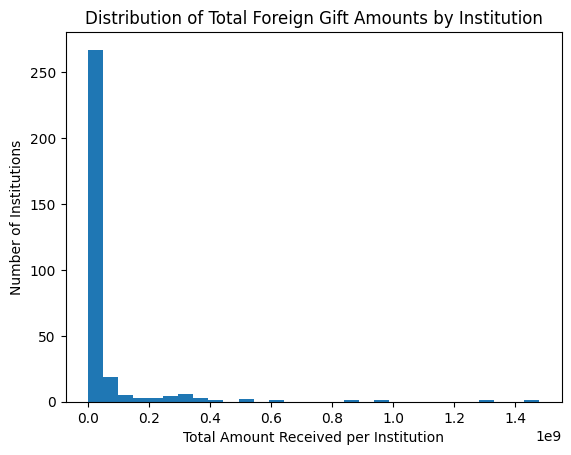

Top 15 Giftors by Total Amount Provided:

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486


In [4]:
#Q2 Part 5
counts = df["Country of Giftor"].value_counts()
print("The top 15 countries in number of gifts is: \n"+ counts.head(15).to_string())
country_sums = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum()
country_sums = country_sums.sort_values(ascending=False)
print("The top 15 countries in total amount of gifts is: \n"+ country_sums.head(15).to_string())

#Q2 Part 6

inst_sums = (df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False))
print("Top 15 Institutions by Total Amount Received:\n")
top15 = inst_sums.head(15)
print(top15.to_string())
plt.hist(inst_sums, bins=30)
plt.xlabel("Total Amount Received per Institution")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gift Amounts by Institution")
plt.show()

#Q2 Part 7
giftor_sums = (df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False))

top15_giftors = giftor_sums.head(15)

print("Top 15 Giftors by Total Amount Provided:\n")
print(top15_giftors.to_string())

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Q3 Part 1
df = pd.read_csv("/content/airbnb_hw (3).csv")

#Q3 Part 2
print(df.shape) # Dimensions: 30478 x 13, # of observations is 30478
print(df.columns) #variables
print(df.head())

#Q3 Part 3

roomtype_propertytype= pd.crosstab(df['Room Type'], df['Property Type'])
print(roomtype_propertytype)

"""
Patterns noticed: Private rooms most common in apartments but still common in all other property types.
Shared rooms are overall the least common across all property types.

Properties where private rooms are more common than entire properties:
Bed & Breakfast, Castle, Chalet, Dorm, House, Hut, Other, Tent, Treehouse
"""

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                 

'\nPatterns noticed: Private rooms most common in apartments but still common in all other property types.\nShared rooms are overall the least common across all property types.\n\nProperties where private rooms are more common than entire properties:\nBed & Breakfast, Castle, Chalet, Dorm, House, Hut, Other, Tent, Treehouse\n'

Statistical description of Price:
count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
object


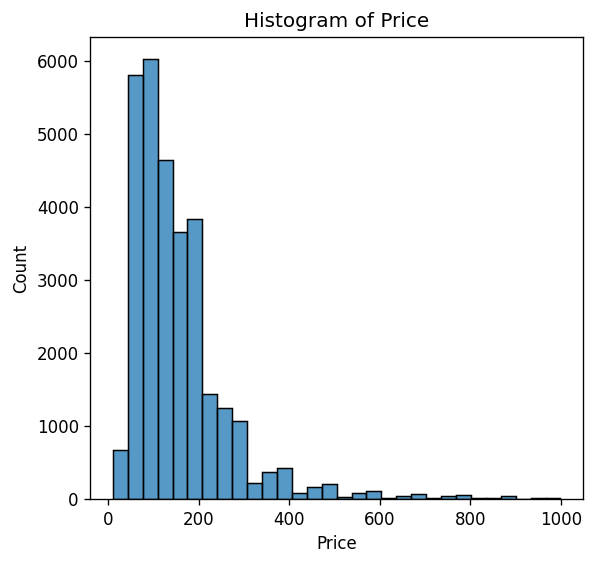

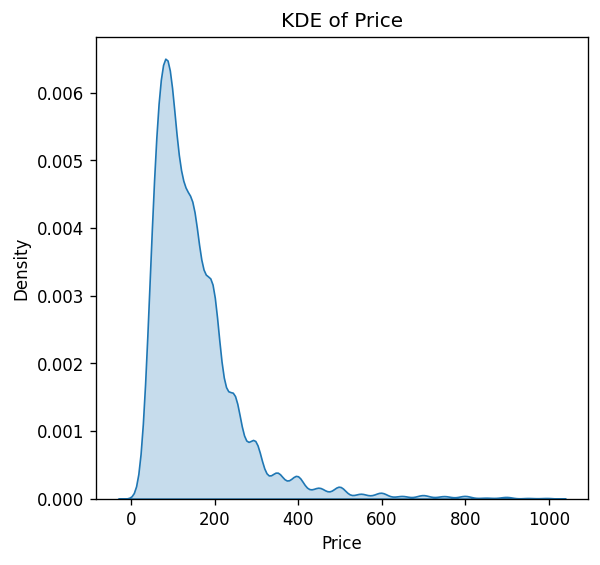

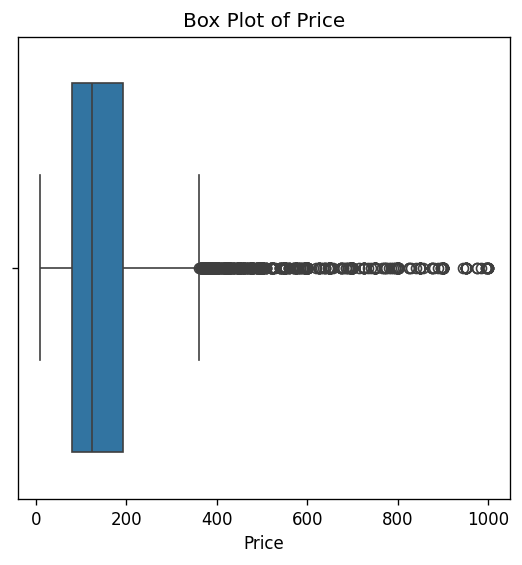

Statistical description of logged price:
count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


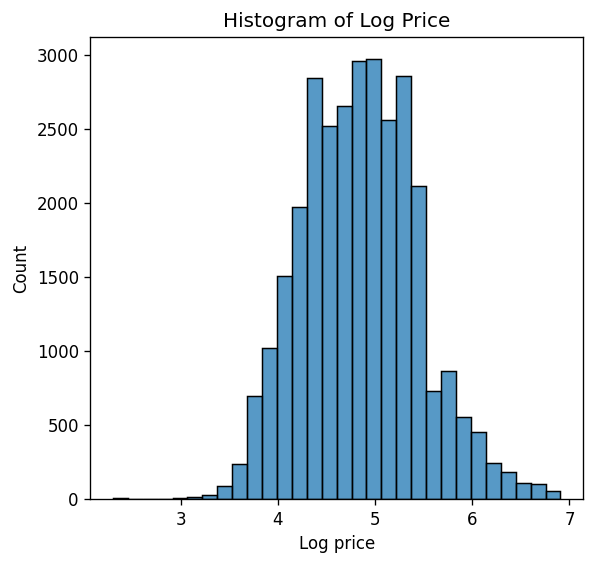

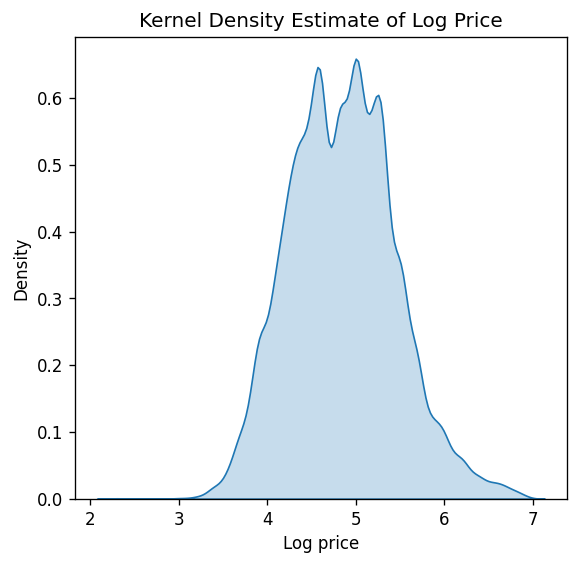

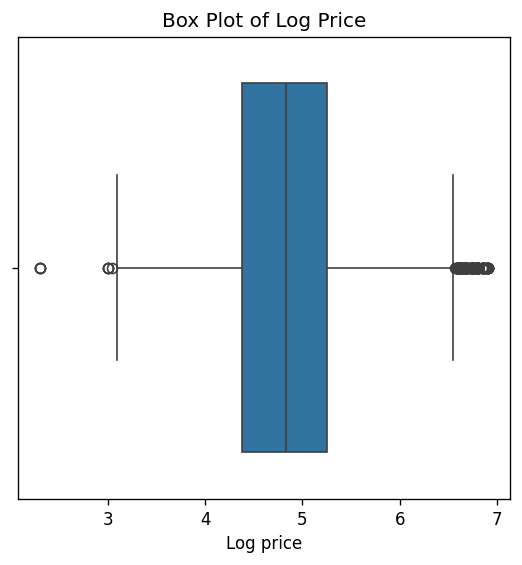

"\n\nObservations:\nWe see that the log of the data creates a much more equal distribtution due to the fact that extremely large values don't skew the \ndata as much. The median is much clearer and the quartiles are much more evenly spaced with much less extreme outliers skewing the data.\n"

In [6]:
#Q3 Part 4

print("Statistical description of Price:")
print(df['Price'].describe())
print(df["Price"].dtype)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")


plt.figure(figsize=(18, 5), dpi=120)

#hist
plt.subplot(1, 3, 1)
sns.histplot(df['Price'], bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(18, 5), dpi=120)
#kde
plt.subplot(1, 3, 2)
sns.kdeplot(df['Price'], fill=True)
plt.title('KDE of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(18, 5), dpi=120)

#box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()



"""

Observations:
We see that the distribution is highly right-skewed as seen from the box long tail in the histogram and KDE.
The box plot also shows that there are a few extremely large values that are skewing the data and are marked as outliers on that plot.
Due to these extreme values that are skewing the data, the data is badly scaled for statistical analysis.
"""

# Log transformation
df['price_log'] = np.log(df['Price'])

print("Statistical description of logged price:")
print(df['price_log'].describe())

plt.figure(figsize=(18, 5), dpi=120)

plt.subplot(1, 3, 1)
sns.histplot(df['price_log'], bins=30)
plt.title('Histogram of Log Price')
plt.xlabel('Log price')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(18, 5), dpi=120)
plt.subplot(1, 3, 2)
sns.kdeplot(df['price_log'], fill=True)
plt.title('Kernel Density Estimate of Log Price')
plt.xlabel('Log price')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(18, 5), dpi=120)
plt.subplot(1, 3, 3)
sns.boxplot(x=df['price_log'])
plt.title('Box Plot of Log Price')
plt.xlabel('Log price')
plt.show()

"""

Observations:
We see that the log of the data creates a much more equal distribtution due to the fact that extremely large values don't skew the
data as much. The median is much clearer and the quartiles are much more evenly spaced with much less extreme outliers skewing the data.
"""



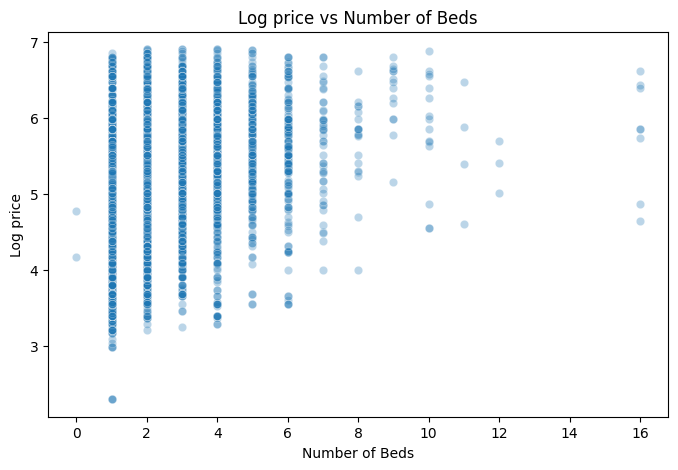

Description of Price grouped by the number of Beds:
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  28

'\nObservations:\nThe scatterplot shows that in general there is a slight positive correlation between the number of beds and the log price. The variability in price by beds tends to be higher\nwith lower bed amounts vs lower variability in higher bed amounts. We also see that higher bed amounts have less total data points with lower bed amounts having a lot more data points.\nThe standard deviation tends to increase with the number of beds.\n\n\n'

In [7]:
#Q3 Part 5
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Beds", y="price_log", alpha=0.3)
plt.title("Log price vs Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Log price")
plt.show()

print("Description of Price grouped by the number of Beds:")
print(df.groupby('Beds')['Price'].describe())

"""
Observations:
The scatterplot shows that in general there is a slight positive correlation between the number of beds and the log price. The variability in price by beds tends to be higher
with lower bed amounts vs lower variability in higher bed amounts. We also see that higher bed amounts have less total data points with lower bed amounts having a lot more data points.
The standard deviation tends to increase with the number of beds.


"""


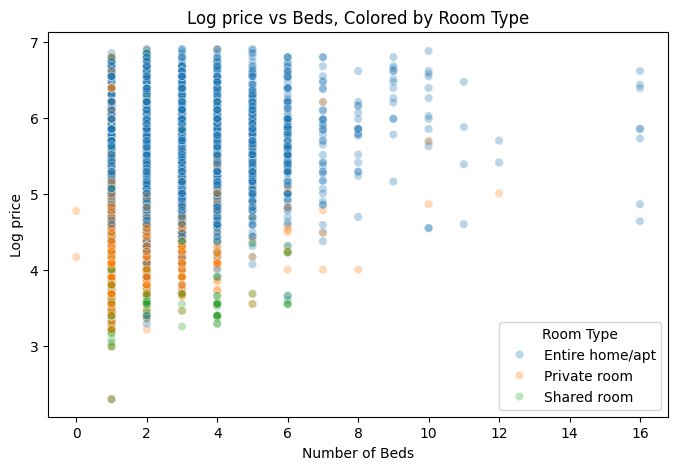

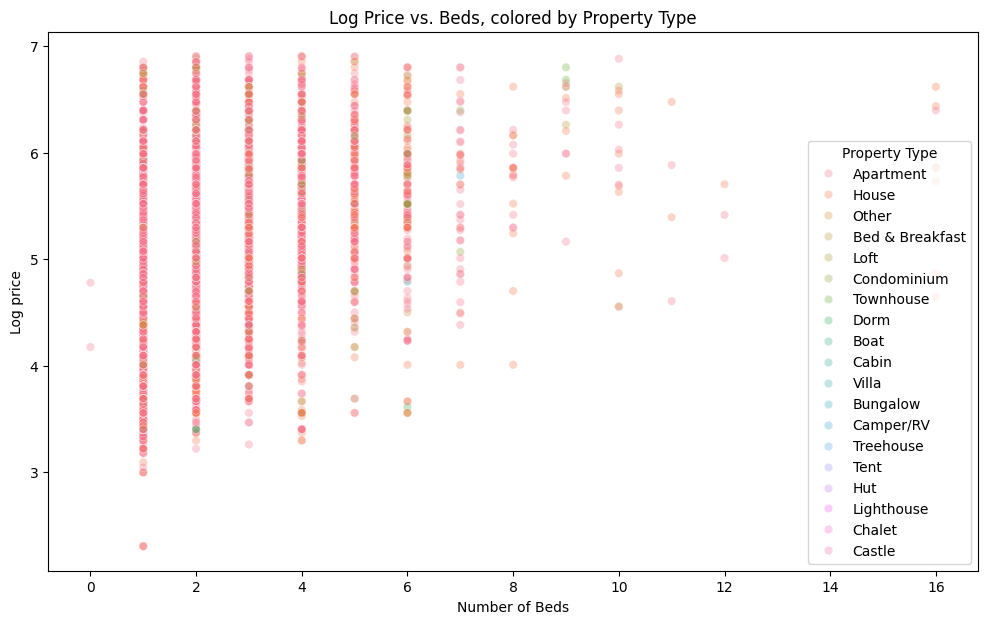

Description of Price conditional on Room Type and Property Type:
                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               

'\nentire homes/apt have the highest average prices as well as the largest standard deviations. Using median is a lot more of accurate measure of centralcy due to the fact that\nthere are a lot of extreme values that would skew the mean towards the right which would not be a problem with the median. \n\n'

In [8]:
#Q3 Part 6

#room type scatter
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,x="Beds",y="price_log",hue="Room Type",alpha=0.3)
plt.title("Log price vs Beds, Colored by Room Type")
plt.xlabel("Number of Beds")
plt.ylabel("Log price")
plt.legend(title="Room Type")
plt.show()


#property type scatter
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df,x="Beds",y="price_log",hue="Property Type",alpha=0.3)
plt.title('Log Price vs. Beds, colored by Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log price')
plt.legend(title='Property Type')
plt.show()

"""
Observations for scatterplots:
For room types we see that entire home/apt tends to have the highest prices followed by private room being in the middle and shared room being the cheapest.
For property types its difficult to make observations as there are so many different property types of colors, but see that house and apartement dominate most of the data
points so it makes it even harder to see patterns about less common property types.

"""

print("Description of Price conditional on Room Type and Property Type:")
print(df.groupby(['Room Type', 'Property Type'])['Price'].describe())

"""
entire homes/apt have the highest average prices as well as the largest standard deviations. Using median is a lot more of accurate measure of centralcy due to the fact that
there are a lot of extreme values that would skew the mean towards the right which would not be a problem with the median.

"""

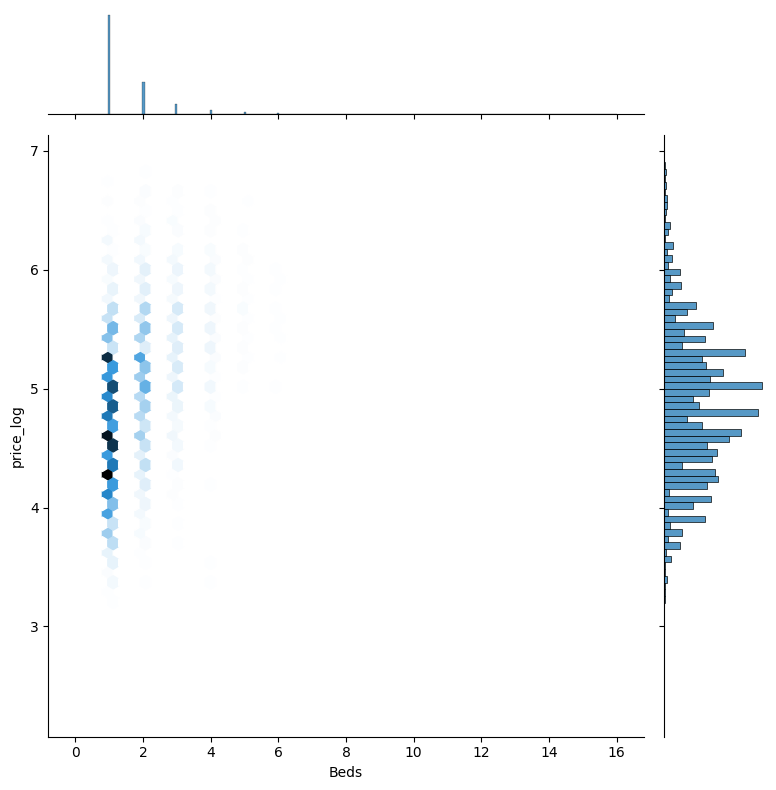

'\nThis shows that most of the data is concentrated around the lower bed ranges and the lower/moderate price ranges while the extreme price listings are rare.\nThis makes me interpret the earlier scatterplots in a different way as I know not to overemphasize the extreme values and outliers but rather focus on the where\nthe core of the data is located.\n'

In [9]:
#Q3 Part 7
sns.jointplot(data=df,x="Beds", y="price_log",kind="hex",  height=8)
plt.show()

"""
This shows that most of the data is concentrated around the lower bed ranges and the lower/moderate price ranges while the extreme price listings are rare.
This makes me interpret the earlier scatterplots in a different way as I know not to overemphasize the extreme values and outliers but rather focus on the where
the core of the data is located.
"""


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Number of observations: 623
Number of variables: 10
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count 

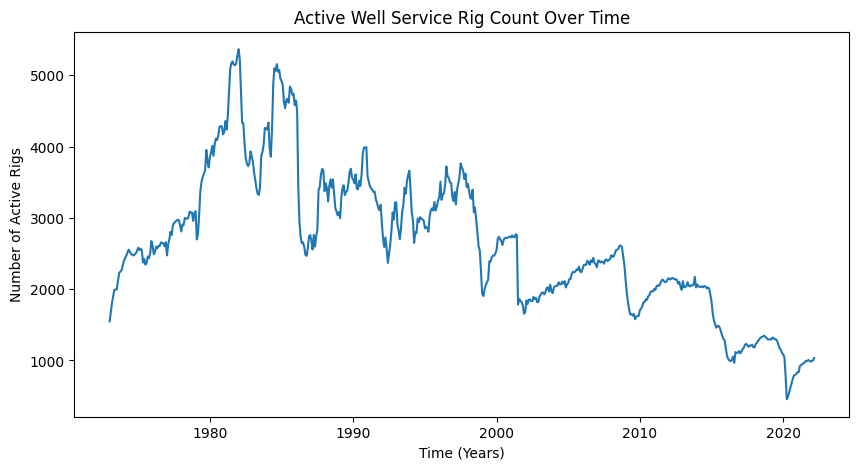

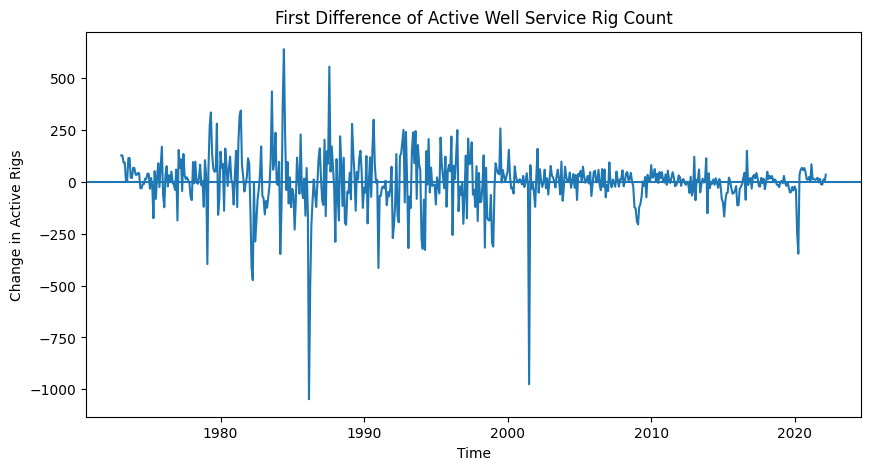

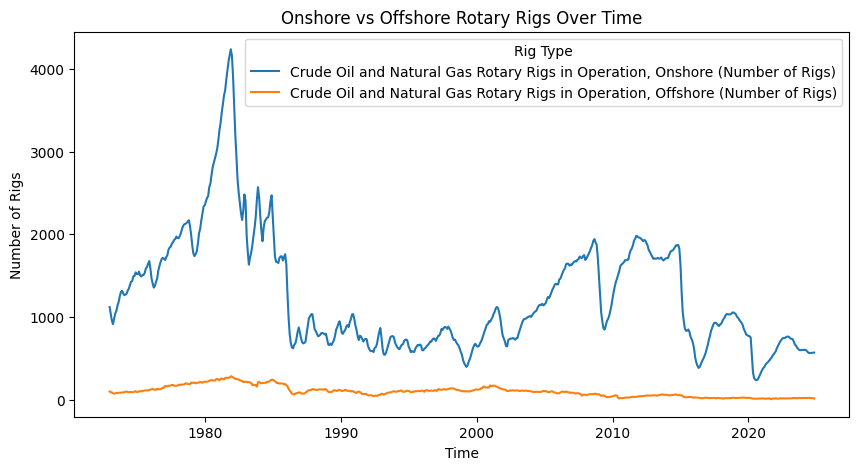

In [15]:
#Q4 Part 1

df= pd.read_csv("/content/drilling_rigs.csv")

(Observation, Variables) = df.shape
print("Number of observations: " + str(Observation))
print("Number of variables: " + str(Variables))
print(df.dtypes)

"""
Some variables that need to be represented as numerics are currently objects which mean they need
to be type casted into numerics. Also month is currently an object and it needs to be changed into a type of
ordinal data type that where distance and order are meaningful.

"""

#Q4 Part 2

df['time'] = pd.to_datetime(df['Month'], format='mixed')


#Q4 Part 3

df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'],errors='coerce')

plt.figure(figsize=(10, 5))
sns.lineplot( data=df, x="time", y="Active Well Service Rig Count (Number of Rigs)")
plt.xlabel("Time (Years)")
plt.ylabel("Number of Active Rigs")
plt.title("Active Well Service Rig Count Over Time")
plt.show()

"""
Observations: From end to end we see an overall decreasing trend. Locally (5-10 years range), we see strong peaks with sharp downfalls showing with the recoveries
over time not being able to match former peaks.
"""
#Q4 Part 4


df["rig_count_diff"] = df["Active Well Service Rig Count (Number of Rigs)"].diff()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="time", y="rig_count_diff")
plt.axhline(0)
plt.xlabel("Time")
plt.ylabel("Change in Active Rigs")
plt.title("First Difference of Active Well Service Rig Count")
plt.show()

"""

this plot is definetly more noisy showing the short term trends in changes in active well service rig count.
Two major crashes are more visible in this graph (late 1980' and early 2000's) as well as the fact that there are a lot more major
crashes of substantial magnitude vs recoveries.

"""

#Q4 Part 5

melted = df.melt(id_vars=["time"], value_vars=["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)", "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)" ],
                 var_name="Rig Type",
    value_name="Number of Rigs")
plt.figure(figsize=(10, 5))
sns.lineplot(data=melted, x="time",y="Number of Rigs",hue="Rig Type")
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.title("Onshore vs Offshore Rotary Rigs Over Time")
plt.show()
